## feature selection

1. remove redundant or highly correlated features
2. select most important features
   1. SelectKBest
   2. SelectPercentile
   3. recursive feature elimination
   4. recursive feature addition
   5. select from coefficients of logistic regression or feature importance from random forest
   6. select from one model and train with aother model (SelectFromModel)

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [6]:
df = pd.read_csv("./datasets/kaggle_redwine/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
from sklearn.feature_selection import  VarianceThreshold

# the columns with variance smaller than 0.05 removed
var_thresh = VarianceThreshold(threshold=0.05)
transformed_data = var_thresh.fit_transform(df)
transformed_data

array([[ 7.4,  1.9, 11. , 34. ,  9.4,  5. ],
       [ 7.8,  2.6, 25. , 67. ,  9.8,  5. ],
       [ 7.8,  2.3, 15. , 54. ,  9.8,  5. ],
       ...,
       [ 6.3,  2.3, 29. , 40. , 11. ,  6. ],
       [ 5.9,  2. , 32. , 44. , 10.2,  5. ],
       [ 6. ,  3.6, 18. , 42. , 11. ,  6. ]])

In [11]:
from sklearn.datasets import  fetch_california_housing

data = fetch_california_housing()
data
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

In [14]:
df = pd.DataFrame(X, columns=col_names)
df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.885342
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.881215
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2.693956
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,2.375521
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.961173
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,1.249120
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,1.599000
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,1.303840
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,1.366455


In [15]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


In [16]:
from sklearn.feature_selection import  chi2, f_classif, f_regression
from sklearn.feature_selection import  mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import  SelectKBest, SelectPercentile

In [17]:
class UnivaraiateFeaturesSelection:
    def __init__(self, n_features, problem_type, scoring):
        if problem_type == "classification":
            valid_scoring = {
                "f_classif": f_classif,
                "chi2": chi2,
                "mutual_info_classif": mutual_info_classif
            }
        else:
            valid_scoring = {
                "f_regression": f_regression,
                "mutual_info_regression": mutual_info_regression
            }
        
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")
        
        if isinstance(n_features, int):
            self.selection = SelectKBest(
                valid_scoring[scoring],
                k=n_features
            )
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(
                valid_scoring[scoring],
                percentile=int(n_features*100)
            )
        else:
            raise Exception("Invalid type of feature")
    
    def fit(self, X, y):
        return self.selection.fit(X, y)
    
    def transform(self, X):
        return self.selection.transform(X)
    
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)

In [19]:
ufs = UnivaraiateFeaturesSelection(
    n_features=0.1,
    problem_type="regression",
    scoring="f_regression"
)
ufs.fit(X, y)
X_transformed = ufs.transform(X)
X_transformed

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [21]:
X.shape

(20640, 8)

In [23]:
# recursive feature elimination (RFE) by sklearn

from sklearn.feature_selection import RFE
from sklearn.linear_model import  LinearRegression
from sklearn.datasets import  fetch_california_housing

data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

model = LinearRegression()
rfe = RFE(
    estimator=model,
    n_features_to_select=3
)
rfe.fit(X, y)

print(X.shape)
X_transformed = rfe.transform(X)
X_transformed.shape

(20640, 8)


(20640, 3)

In [24]:
from sklearn.datasets import  load_diabetes
from sklearn.ensemble import RandomForestRegressor

data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

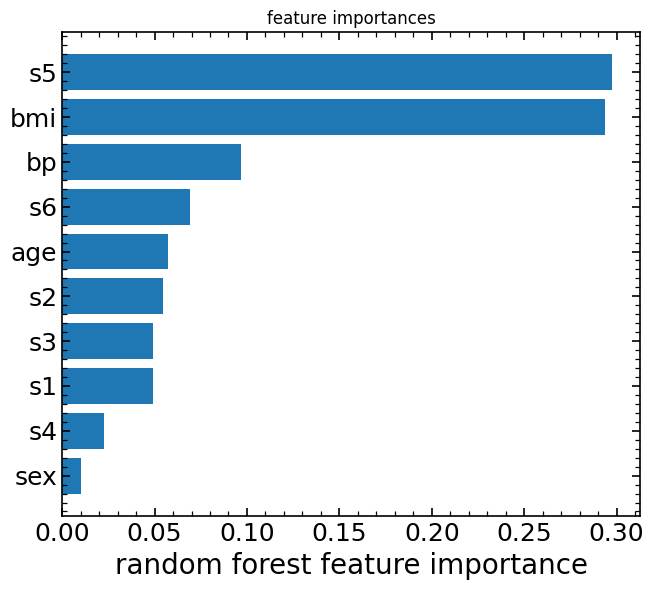

In [25]:
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title("feature importances")
plt.barh(range(len(idxs)), importances[idxs], align="center")
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel("random forest feature importance")
plt.show()

In [28]:
# select from one model and apply to another

from sklearn.feature_selection import SelectFromModel

model = RandomForestRegressor()
sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(X, y)

support = sfm.get_support()
print([
    x for x, y in zip(col_names, support) if y==True
])

['bmi', 's5']
